In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys

In [2]:
# mnist data가 어떻게 구성되어있는지 확인
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('train image : %d' % (X_train.shape[0]))
print('test image : %d' % (X_test.shape[0]))

train image : 60000
test image : 10000


In [3]:
print(X_train.shape)

(60000, 28, 28)


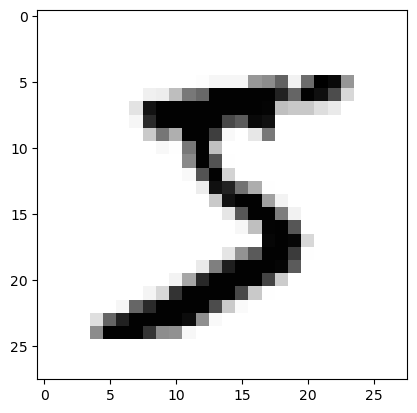

In [4]:
plt.imshow(X_train[0], cmap="Greys") # 이미지 중 한개를 흑백으로 불러옴
plt.show()

In [5]:
# 불러온 이미지를 코드로 확인
# 흰색 배경 = 0, 글씨가 들어가면 1~255 중 하나임
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
# 원래 픽셀값은 0~255인데 걔를 float으로 만들고 255로 나누면 0~1 범위로 축소시킬수있음
# 0~255는 딥러닝 시키기에 스케일이 너무커서 스케일 값을 줄인것
X_train = X_train.astype(float) / 255

X_test = X_test.reshape(X_test.shape[0], 28*28).astype(float) / 255

print(y_train[0])

5


In [7]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
# y 타겟 값은 > 0~9 니까 10차원 인코딩임 
# 카테고리값을 one hot encoding을 통해 타겟 값으로 변환하는게 pd.get_dummies(y) >> softmax를 사용하기위해서
print(type(y_train))

<class 'numpy.ndarray'>


In [9]:
# numpy 배열을 어떻게 one hot encoding [문자열을 숫자 0, 1로만 이루어진 형태로 변환] 하느냐 
# 그래서 to_categorical을 import 했음
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(y_train[0]) # 10차원 배열로 변경

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [12]:
model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = 'deep-learning/data/model'
if not os.path.exists(model_dir):
    os.mkdir(model_path)
    
model_path = 'deep-learning/data/model/mnist.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping, checkpointer])


Epoch 1: val_loss improved from inf to 0.19102, saving model to deep-learning/data/model\mnist.hdf5

Epoch 2: val_loss improved from 0.19102 to 0.14604, saving model to deep-learning/data/model\mnist.hdf5

Epoch 3: val_loss improved from 0.14604 to 0.11248, saving model to deep-learning/data/model\mnist.hdf5

Epoch 4: val_loss improved from 0.11248 to 0.10625, saving model to deep-learning/data/model\mnist.hdf5

Epoch 5: val_loss improved from 0.10625 to 0.09254, saving model to deep-learning/data/model\mnist.hdf5

Epoch 6: val_loss improved from 0.09254 to 0.08579, saving model to deep-learning/data/model\mnist.hdf5

Epoch 7: val_loss improved from 0.08579 to 0.08324, saving model to deep-learning/data/model\mnist.hdf5

Epoch 8: val_loss did not improve from 0.08324

Epoch 9: val_loss improved from 0.08324 to 0.08171, saving model to deep-learning/data/model\mnist.hdf5

Epoch 10: val_loss did not improve from 0.08171

Epoch 11: val_loss improved from 0.08171 to 0.08065, saving model 

In [16]:
print('Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9821
Test Accuracy : 0.9821


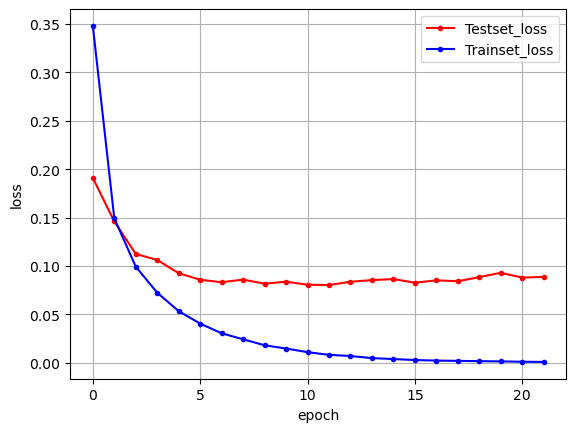

In [17]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()